In [9]:
import os


import geopandas as gpd
from  fiona import listlayers

#maps
indiamaps='https://github.com/gokussj100/simpleplot/raw/main/maps/india_24383/indiaMaps_24383.gpkg'

#layers in maps
listlayers(indiamaps)

['country', 'cities', 'rivers']

In [11]:
india=gpd.read_file(indiamaps,layer='country')
india_cities=gpd.read_file(indiamaps,layer='cities')
india_rivers=gpd.read_file(indiamaps,layer='rivers')

In [12]:
india.crs.to_epsg()==india_cities.crs.to_epsg()==india_rivers.crs.to_epsg()

True

<Axes: >

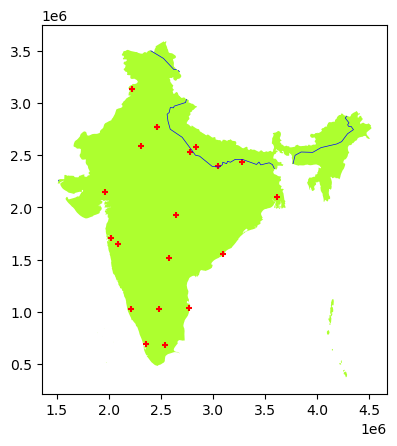

In [13]:
# plotting
base = india.plot(facecolor="greenyellow")
india_rivers.plot(edgecolor='blue', linewidth=0.5,ax=base)
india_cities.plot(marker='+', color='red', markersize=15,ax=base)

In [14]:
india

,COUNTRY,geometry
0,India,"MULTIPOLYGON (((4019310.865 2247364.698, 40125..."


In [16]:
india.boundary

0    MULTILINESTRING ((4019310.865 2247364.698, 401...
dtype: geometry

<Axes: >

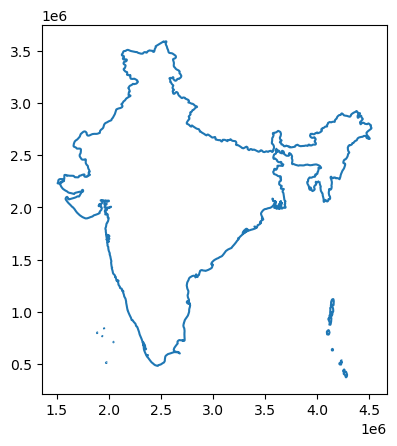

In [17]:
india.boundary.plot()

In [19]:
type(india.boundary)

geopandas.geoseries.GeoSeries

In [20]:
# conversion
india_border=india.boundary.to_frame() 

# new column (optional)
india_border['name']='India' 

# renaming the geometry column
india_border.rename(columns={0:'geometry'},inplace=True) 

#setting the geometry (the name is not enough)
india_border = india_border.set_geometry("geometry")

# verifying:
india_border.crs

<Projected CRS: EPSG:24383>
Name: Kalianpur 1975 / India zone IVa
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: India - mainland onshore south of 15°N.
- bounds: (73.94, 8.02, 80.4, 15.01)
Coordinate Operation:
- name: India zone IVa (1975 metres)
- method: Lambert Conic Conformal (1SP)
Datum: Kalianpur 1975
- Ellipsoid: Everest 1830 (1975 Definition)
- Prime Meridian: Greenwich

In [21]:
india_border

,geometry,name
0,"MULTILINESTRING ((4019310.865 2247364.698, 401...",India


In [24]:
india_states=gpd.read_file(os.path.join("maps","ind_adm_ibge_2016_shp","polbnda_ind.shp"))
india_municipalities=gpd.read_file(os.path.join("maps","ind_adm_ibge_2016_shp","IND_adm1.shp"))

In [25]:
india_states.crs, india_municipalities.crs

(<Geographic 2D CRS: EPSG:4326>
 Name: WGS 84
 Axis Info [ellipsoidal]:
 - Lat[north]: Geodetic latitude (degree)
 - Lon[east]: Geodetic longitude (degree)
 Area of Use:
 - name: World.
 - bounds: (-180.0, -90.0, 180.0, 90.0)
 Datum: World Geodetic System 1984 ensemble
 - Ellipsoid: WGS 84
 - Prime Meridian: Greenwich,
 <Geographic 2D CRS: EPSG:4326>
 Name: WGS 84
 Axis Info [ellipsoidal]:
 - Lat[north]: Geodetic latitude (degree)
 - Lon[east]: Geodetic longitude (degree)
 Area of Use:
 - name: World.
 - bounds: (-180.0, -90.0, 180.0, 90.0)
 Datum: World Geodetic System 1984 ensemble
 - Ellipsoid: WGS 84
 - Prime Meridian: Greenwich)

<Axes: >

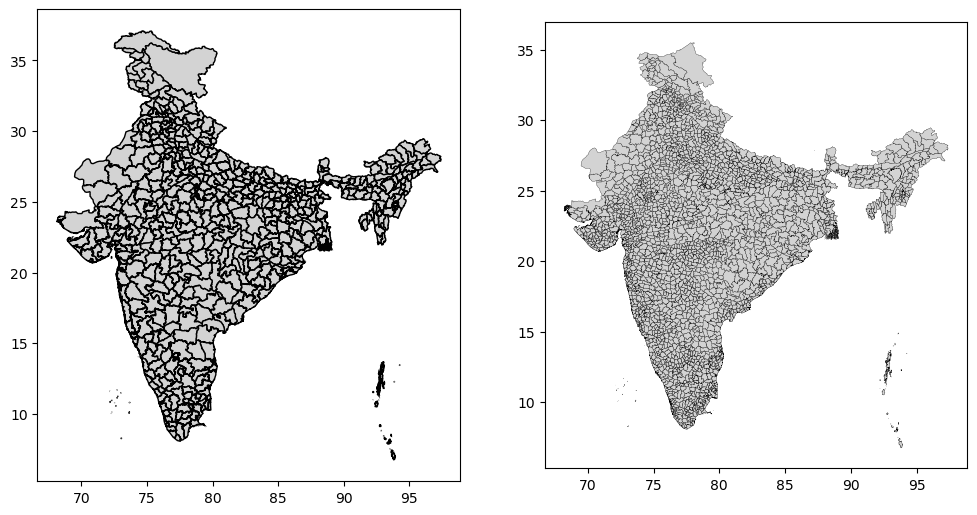

In [26]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=False, sharey=False, figsize=(12,12))

india_states.plot(ax=ax1, facecolor='lightgrey', edgecolor='black')
india_municipalities.plot(ax=ax2, facecolor='lightgrey', edgecolor='black',linewidth=0.2)
